# Name - Priyesh Raj 

# Task - To predict the percentage of students based on the number of hours studied using Simple Linear Regression.

In [1]:
#Importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()

In [3]:
# Loading the dataset from the URL
data_url = 'http://bit.ly/w-data'
raw_data  = pd.read_csv(data_url)
raw_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Preprocessing The data

In [5]:
raw_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Looking for missing values
raw_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# There are no missing value.Now we will plot the data to see the relationships between these two,if any.

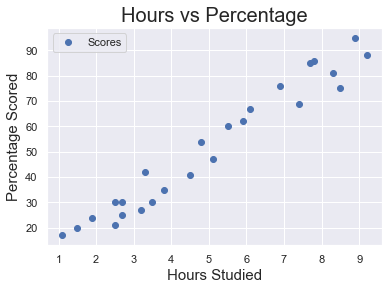

In [8]:
raw_data.plot(x = 'Hours',y = 'Scores',style = 'o')
plt.title('Hours vs Percentage',fontsize = 20)
plt.xlabel('Hours Studied',fontsize = 15)
plt.ylabel('Percentage Scored',fontsize = 15)
plt.show()

From the plot above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.
Now we will split the dataset into tain and test data using train_test_split and will try to fit a regression line.

In [10]:
x = raw_data['Hours']
X = x.values.reshape(-1,1)
y = raw_data['Scores']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [11]:
# Training the model
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

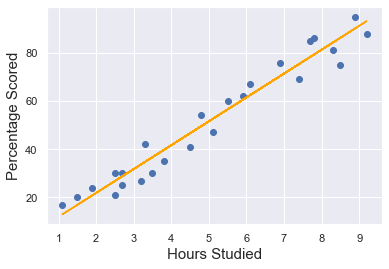

In [12]:
# Plotting the regression line
plt.scatter(x,y)
#regresion line
yhat = reg.coef_*X + reg.intercept_
plt.plot(x,yhat,c = 'orange')
plt.xlabel('Hours Studied',fontsize = 15)
plt.ylabel('Percentage Scored',fontsize = 15)
plt.show()

In [28]:
# Let's check the outputs of the regression
# I'll store them in y_hat_values as this is the 'theoretical' name of the predictions
y_hat_values = reg.predict(x_train)

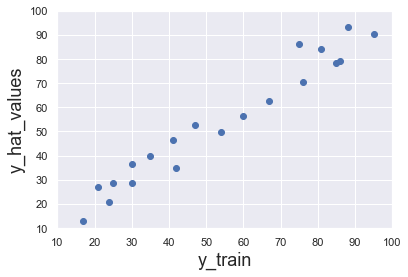

In [20]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat_values)
# Let's also name the axes
plt.xlabel('y_train',size=18)
plt.ylabel('y_hat_values',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(10,100)
plt.ylim(10,100)
plt.show()

c:\users\priyesh raj\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

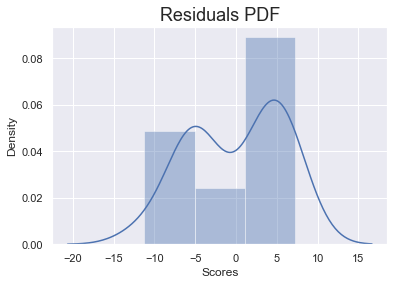

In [32]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat_values)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train 

In [30]:
# Find the R-squared of the model
reg.score(x_train,y_train)

0.9515510725211552

# Testing
# Once we have trained and fine-tuned our model, we can proceed to testing it.

In [33]:
# Our test inputs are 'x_test', while the outputs: 'y_test' 
y_hat_test = reg.predict(x_test)

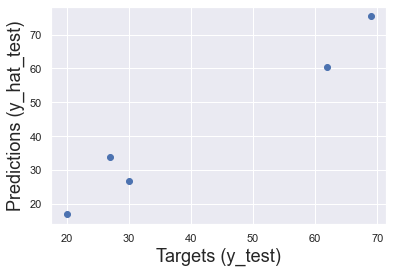

In [35]:
# Create a scatter plot with the test targets and the test predictions
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [36]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual':y_test,'Predicted':y_hat_test})
df.reset_index(drop=True)

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [41]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df['Residual'] = df['Actual'] - df['Predicted']
df['Difference%'] = np.absolute(df['Residual']/df['Actual']*100)
df.reset_index(drop=True)

,Actual,Predicted,Residual,Difference%
0,20,16.884145,3.115855,15.579276
1,27,33.732261,-6.732261,24.934299
2,69,75.357018,-6.357018,9.213070
3,30,26.794801,3.205199,10.683996
4,62,60.491033,1.508967,2.433817


In [42]:
# Now predicting the percentage of students who studied 9.25hrs
hours = 9.25
percent_pred = reg.predict([[hours]])
percent_pred

array([93.69173249])

In [43]:
# Evaluating the model
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_hat_test)) 

Mean Absolute Error: 4.183859899002975
